In [84]:
## generates figures demonstrating how the time grid interpolation works

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np
import pandas as pd
import scipy
from scipy.integrate import cumtrapz

import trfp
import gm2

matplotlib.rc('xtick', labelsize=10)     
matplotlib.rc('ytick', labelsize=10)
matplotlib.rc('axes', titlesize=10)
matplotlib.rc('axes', labelsize=10)
plt.rcParams["font.family"] = "serif"

sns.set_style('darkgrid')

In [2]:
## import a single run from ROOT. 3960 is fine.
prefix = 'data1/newg2/DataProduction/Offline/ArtTFSDir/v9_20_00/FieldPlainRootOutput_'
fp_run = gm2.FixedProbe([3960], prefix=prefix)
fp_time, fp_freq, fp_qual = fp_run.getBasics()
# drop first event, which is always 0 from import
fp_time = fp_time[1:,:]/1.0e9  # convert nsec to sec
fp_freq = fp_freq[1:,:]
fp_qual = fp_qual[1:,:]

Reading event 4360/4370 99.77%  
loop done: 100%                                    


In [17]:
grid_times = np.arange(np.ceil(np.max(fp_time[0,:])),
                       np.floor(np.min(fp_time[-1,:]))+1,
                       1.0)
edge_times = np.arange(grid_times[0]-0.5, grid_times[-1]+1.5, 1.0)
grid_freqs = np.empty([grid_times.size, 378])

for fp in range(378):
    all_times = np.append(edge_times,fp_time[:,fp])

    sort_index = np.argsort(all_times)
    unsort_index = np.argsort(sort_index)
    edge_index = unsort_index[0:len(grid_times)+1]

    # interpolate the freqs on the time grid edges
    edge_freqs = np.interp(edge_times, fp_time[:,fp], fp_freq[:,fp])

    # sort all times and all freqs by method calculated above
    all_freqs = np.append(edge_freqs, fp_freq[:,fp])
    sort_freqs = all_freqs[sort_index]
    sort_times = all_times[sort_index]

    # run cumtrapz on sorted times and freqs
    integrated_freqs = cumtrapz(sort_freqs, x=sort_times, initial=0)

    # take differences of the integrated freqs at grid edge points
    # to find the integral between the two points

    grid_freqs[:,fp] = np.diff(integrated_freqs[edge_index])


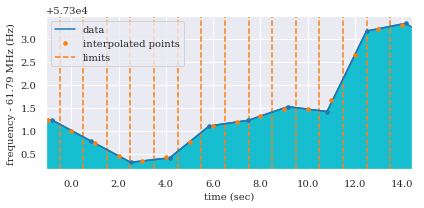

In [96]:
pr = 200
range_ = range(100,110)

fig1, ax1 = plt.subplots(1,1)

ax1.plot(fp_time[range_,pr], fp_freq[range_,pr], color='C0', label='data')
ax1.plot(fp_time[range_,pr], fp_freq[range_,pr], '.', color='C0', markersize=7)

ylow, yhigh = ax1.get_ylim()
xlow, xhigh = ax1.get_xlim()

ax1.plot(fp_time[:,pr], fp_freq[:,pr], color='C0')

ax1.vlines(edge_times, ylow, yhigh, linestyles='dashed', color='C1', label='limits')

ax1.fill_between(fp_time[:,pr], fp_freq[:,pr], color='C9')

ax1.plot(grid_times[:], grid_freqs[:,pr], '.', color='C1', markersize=7, label='interpolated points')

ax1.set_xlim(xlow+0.5, xhigh-0.5)
ax1.set_ylim(ylow, yhigh)

ax1.set_ylabel('frequency - 61.79 MHz (Hz)', fontdict={'family':'serif'})

xticks = ax1.get_xticks()
ax1.set_xticklabels(xticks-xticks[0]-2)
ax1.set_xlabel('time (sec)', fontdict={'family':'serif'})

ax1.legend(prop={'size':10, 'family':'serif'})

fig1.set_size_inches(6,3)
fig1.tight_layout()

fig1.savefig('time_grid.png', dpi=300)

In [53]:
xticks

array([1.52439102e+09, 1.52439102e+09, 1.52439102e+09, 1.52439102e+09,
       1.52439102e+09, 1.52439103e+09, 1.52439103e+09, 1.52439103e+09,
       1.52439103e+09, 1.52439103e+09])